### Data Set:
We will make use of concrete.csv data set The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not
scaled).The data has 8 quantitative input variables, and 1 quantitative output
variable, and 1030 instances (observations).

Attribute Information:

● Cement    : measured in  kg in a m3 mixture 

● Blast     : measured in  kg in a m3 mixture 

● Fly ash     : measured in  kg in a m3 mixture 

● Water     : measured in  kg in a m3 mixture 

● Superplasticizer   : measured in  kg in a m3 mixture 

● Coarse Aggregate   : measured in  kg in a m3 mixture 

● Fine Aggregate   : measured in  kg in a m3 mixture 

● Age     : day (1~365) 

● Concrete compressive strength measured in MPa


### Objective:
The purpose is to Modeling of strength of high performance concrete using Machine Learning. Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients.
These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate. How will we meet our objective? We will use decision tree regression to build the model. We will use Feature Engineering, Model Building and Tuning Techniques to fine tune our model and predict the best fit model.

### Importing the libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#importing seaborn for statistical plots
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing the feature scaling library
from sklearn.preprocessing import StandardScaler
#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# Import Linear Regression, Ridge and Lasso machine learning library
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
# Import support vector regressor machine learning library
from sklearn.svm import SVR
#Import the metrics
from sklearn import metrics
#Import the Voting regressor for Ensemble
from sklearn.ensemble import VotingRegressor
# Import stats from scipy
from scipy import stats
# Import zscore for scaling
from scipy.stats import zscore
#importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#importing the K fold
from sklearn.model_selection import KFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score
#importing the preprocessing library
from sklearn import preprocessing
# importing the Polynomial features
from sklearn.preprocessing import PolynomialFeatures
#importing kmeans clustering library
from sklearn.cluster import KMeans
from sklearn.utils import resample


### Loading and Checking the Dataset

In [2]:
concrete_df=pd.read_csv("concrete.csv")

In [3]:
concrete_df.head(50)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [4]:
concrete_df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [5]:
concrete_df.shape

(1030, 9)

In [6]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
concrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


#### Observation :

There are eight independent variables ( cement, slag, ash, water, superplastic, coarseagg, fineagg, age) and one dependent variable (strength).

There are 1030 rows and 9 columns.

All the records are numeric.

Age is integer type all other columns are float type. 

Memory usage is 72.5 KB. 

There are no null values in the data.

We can see that cement,slag,ash are left skewed

### Performing EDA:

Finding Any Missing Value

Finding Outliers

Understanding attributes using descriptive statistics

visualizing attribute distribution using univariate and multivariate analysis

Finding attribute correlation and analysing which attribute is more important

#### Finding The Missing Values

Let's find the count of each attribite & treat the missing values

In [8]:
from sklearn.impute import SimpleImputer
X = concrete_df.iloc[:,0:19] #separting all numercial independent attribute
#y = vehdf.iloc[:,18] #seprarting class attribute. 
#imputer = SimpleImputer()
imputer = SimpleImputer(missing_values=np.nan, strategy='median', verbose=1)
#fill missing values with mean column values
transformed_values = imputer.fit_transform(X)
column = X.columns
print(column)
concrete_df = pd.DataFrame(transformed_values, columns = column )
concrete_df.describe()

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
print("Original null value count:", concrete_df.isnull().sum())
print("\n\nCount after we impiuted the NaN value: ", concrete_df.isnull().sum())

Original null value count: cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64


Count after we impiuted the NaN value:  cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64


#### Observation:
If you carefully observe the above, after we imputed the datfarme series , using simpleimputer, we see that there aren't any  missing NaN values in the dataset.

#### Understanding each attributes :

Univariate Analysis

Quick descriptive statistics to make some meaningful sense of data

Plotting univariate distribution

Finding outliers & skewness in data series.

Treating outliers

##### Cement

In [10]:
print('Range of values: ', concrete_df['cement'].max()-concrete_df['cement'].min())

Range of values:  438.0


In [11]:
#Central values 
print('Minimum age: ', concrete_df['cement'].min())
print('Maximum age: ',concrete_df['cement'].max())
print('Mean value: ', concrete_df['cement'].mean())
print('Median value: ',concrete_df['cement'].median())
print('Standard deviation: ', concrete_df['cement'].std())
print('Null values: ',concrete_df['cement'].isnull().any())

Minimum age:  102.0
Maximum age:  540.0
Mean value:  281.1678640776698
Median value:  272.9
Standard deviation:  104.50636449481536
Null values:  False


In [12]:
#Quartiles

Q1=concrete_df['cement'].quantile(q=0.25)
Q3=concrete_df['cement'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['cement']))

1st Quartile (Q1) is:  192.375
3st Quartile (Q3) is:  350.0
Interquartile range (IQR) is  157.625


In [13]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in cement: ', L_outliers)
print('Upper outliers in cement: ', U_outliers)

Lower outliers in cement:  -44.0625
Upper outliers in cement:  586.4375


In [14]:
print('Number of outliers in cement upper : ', concrete_df[concrete_df['cement']>586.4375]['cement'].count())
print('Number of outliers in cement lower : ', concrete_df[concrete_df['cement']<-44.0625]['cement'].count())
print('% of Outlier in cement upper: ',round(concrete_df[concrete_df['cement']>586.4375]['cement'].count()*100/len(concrete_df)), '%')
print('% of Outlier in cement lower: ',round(concrete_df[concrete_df['cement']<-44.0625]['cement'].count()*100/len(concrete_df)), '%')

Number of outliers in cement upper :  0
Number of outliers in cement lower :  0
% of Outlier in cement upper:  0.0 %
% of Outlier in cement lower:  0.0 %


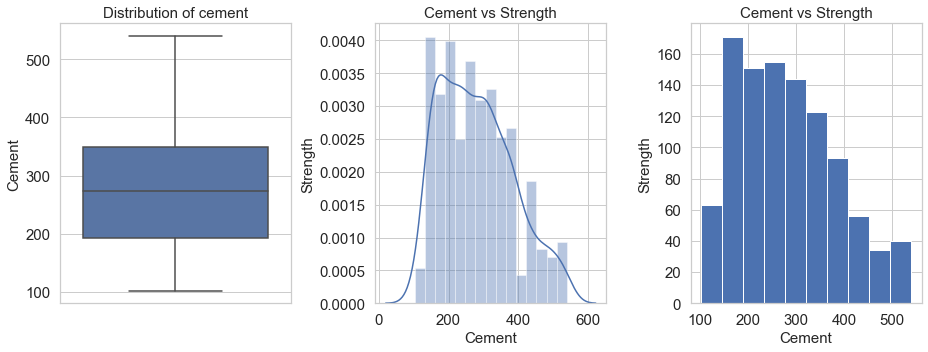

In [15]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='cement',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Cement', fontsize=15)
ax1.set_title('Distribution of cement', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['cement'],ax=ax2)
ax2.set_xlabel('Cement', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Cement vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['cement'])
ax3.set_xlabel('Cement', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Cement vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

##### Slag


In [16]:
#Range of values 
print('Range of values: ', concrete_df['slag'].max()-concrete_df['slag'].min())

Range of values:  359.4


In [17]:
#Central values

print('Minimum slag: ', concrete_df['slag'].min())
print('Maximum slag: ',concrete_df['slag'].max())
print('Mean value: ', concrete_df['slag'].mean())
print('Median value: ',concrete_df['slag'].median())
print('Standard deviation: ', concrete_df['slag'].std())
print('Null values: ',concrete_df['slag'].isnull().any())

Minimum slag:  0.0
Maximum slag:  359.4
Mean value:  73.89582524271844
Median value:  22.0
Standard deviation:  86.2793417481054
Null values:  False


In [18]:
#Quartiles

Q1=concrete_df['slag'].quantile(q=0.25)
Q3=concrete_df['slag'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['slag']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  142.95
Interquartile range (IQR) is  142.95


In [19]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in slag: ', L_outliers)
print('Upper outliers in slag: ', U_outliers)

Lower outliers in slag:  -214.42499999999998
Upper outliers in slag:  357.375


In [20]:
print('Number of outliers in slag upper : ', concrete_df[concrete_df['slag']>357.375]['slag'].count())
print('Number of outliers in slag lower : ', concrete_df[concrete_df['slag']<-214.425]['slag'].count())
print('% of Outlier in slag upper: ',round(concrete_df[concrete_df['slag']>357.375]['slag'].count()*100/len(concrete_df)), '%')
print('% of Outlier in slag lower: ',round(concrete_df[concrete_df['slag']<-214.425]['slag'].count()*100/len(concrete_df)), '%')

Number of outliers in slag upper :  2
Number of outliers in slag lower :  0
% of Outlier in slag upper:  0.0 %
% of Outlier in slag lower:  0.0 %


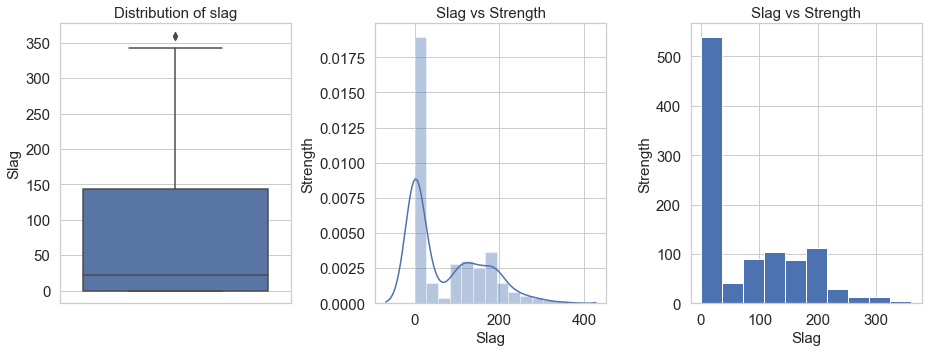

In [21]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='slag',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Slag', fontsize=15)
ax1.set_title('Distribution of slag', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['slag'],ax=ax2)
ax2.set_xlabel('Slag', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Slag vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['slag'])
ax3.set_xlabel('Slag', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Slag vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


#### Ash

In [22]:
#Range of values observed

print('Range of values: ', concrete_df['ash'].max()-concrete_df['ash'].min())

Range of values:  200.1


In [23]:
#Central values

print('Minimum ash: ', concrete_df['ash'].min())
print('Maximum ash: ',concrete_df['ash'].max())
print('Mean value: ', concrete_df['ash'].mean())
print('Median value: ',concrete_df['ash'].median())
print('Standard deviation: ', concrete_df['ash'].std())
print('Null values: ',concrete_df['ash'].isnull().any())

Minimum ash:  0.0
Maximum ash:  200.1
Mean value:  54.188349514563086
Median value:  0.0
Standard deviation:  63.99700415268794
Null values:  False


In [24]:
#Quartiles 

Q1=concrete_df['ash'].quantile(q=0.25)
Q3=concrete_df['ash'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['ash']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  118.3
Interquartile range (IQR) is  118.3


In [25]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in ash: ', L_outliers)
print('Upper outliers in ash: ', U_outliers)

Lower outliers in ash:  -177.45
Upper outliers in ash:  295.75


In [26]:
print('Number of outliers in ash upper : ', concrete_df[concrete_df['ash']>295.75]['ash'].count())
print('Number of outliers in ash lower : ', concrete_df[concrete_df['ash']<-177.45]['ash'].count())
print('% of Outlier in ash upper: ',round(concrete_df[concrete_df['ash']>295.75]['ash'].count()*100/len(concrete_df)), '%')
print('% of Outlier in ash lower: ',round(concrete_df[concrete_df['ash']<-177.45]['ash'].count()*100/len(concrete_df)), '%')

Number of outliers in ash upper :  0
Number of outliers in ash lower :  0
% of Outlier in ash upper:  0.0 %
% of Outlier in ash lower:  0.0 %


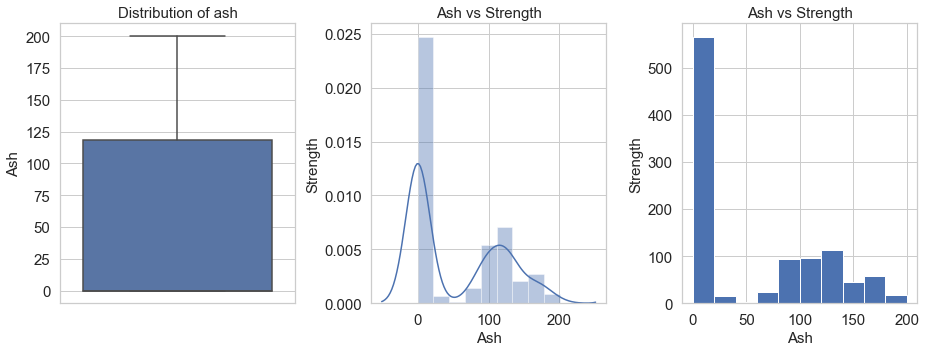

In [27]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='ash',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Ash', fontsize=15)
ax1.set_title('Distribution of ash', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['ash'],ax=ax2)
ax2.set_xlabel('Ash', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Ash vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['ash'])
ax3.set_xlabel('Ash', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Ash vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


#### Water

In [28]:
#Range of values observed

print('Range of values: ', concrete_df['water'].max()-concrete_df['water'].min())

Range of values:  125.2


In [29]:
#Central values
print('Minimum water: ', concrete_df['water'].min())
print('Maximum water: ',concrete_df['water'].max())
print('Mean value: ', concrete_df['water'].mean())
print('Median value: ',concrete_df['water'].median())
print('Standard deviation: ', concrete_df['water'].std())
print('Null values: ',concrete_df['water'].isnull().any())

Minimum water:  121.8
Maximum water:  247.0
Mean value:  181.56728155339798
Median value:  185.0
Standard deviation:  21.35421856503245
Null values:  False


In [30]:
#Quartiles
Q1=concrete_df['water'].quantile(q=0.25)
Q3=concrete_df['water'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['water']))

1st Quartile (Q1) is:  164.9
3st Quartile (Q3) is:  192.0
Interquartile range (IQR) is  27.099999999999994


In [31]:
# Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in water: ', L_outliers)
print('Upper outliers in water: ', U_outliers)

Lower outliers in water:  124.25000000000001
Upper outliers in water:  232.64999999999998


In [32]:
print('Number of outliers in water upper : ', concrete_df[concrete_df['water']>232.65]['water'].count())
print('Number of outliers in water lower : ', concrete_df[concrete_df['water']<124.25]['water'].count())
print('% of Outlier in water upper: ',round(concrete_df[concrete_df['water']>232.65]['water'].count()*100/len(concrete_df)), '%')
print('% of Outlier in water lower: ',round(concrete_df[concrete_df['water']<124.25]['water'].count()*100/len(concrete_df)), '%')

Number of outliers in water upper :  4
Number of outliers in water lower :  5
% of Outlier in water upper:  0.0 %
% of Outlier in water lower:  0.0 %


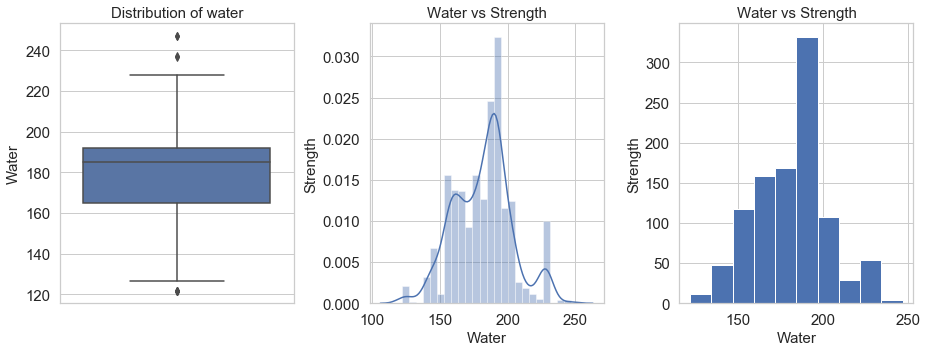

In [33]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='water',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Water', fontsize=15)
ax1.set_title('Distribution of water', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['water'],ax=ax2)
ax2.set_xlabel('Water', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Water vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['water'])
ax3.set_xlabel('Water', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Water vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


#### Superplastic

In [34]:
#Range of values observed

print('Range of values: ', concrete_df['superplastic'].max()-concrete_df['superplastic'].min())

Range of values:  32.2


In [35]:
#Central values

print('Minimum superplastic: ', concrete_df['superplastic'].min())
print('Maximum superplastic: ',concrete_df['superplastic'].max())
print('Mean value: ', concrete_df['superplastic'].mean())
print('Median value: ',concrete_df['superplastic'].median())
print('Standard deviation: ', concrete_df['superplastic'].std())
print('Null values: ',concrete_df['superplastic'].isnull().any())

Minimum superplastic:  0.0
Maximum superplastic:  32.2
Mean value:  6.204660194174756
Median value:  6.4
Standard deviation:  5.973841392485508
Null values:  False


In [36]:
#Quartiles

Q1=concrete_df['superplastic'].quantile(q=0.25)
Q3=concrete_df['superplastic'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['superplastic']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  10.2
Interquartile range (IQR) is  10.2


In [37]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in superplastic: ', L_outliers)
print('Upper outliers in superplastic: ', U_outliers)

Lower outliers in superplastic:  -15.299999999999999
Upper outliers in superplastic:  25.5


In [38]:
print('Number of outliers in superplastic upper : ', concrete_df[concrete_df['superplastic']>25.5]['superplastic'].count())
print('Number of outliers in superplastic lower : ', concrete_df[concrete_df['superplastic']<-15.3]['superplastic'].count())
print('% of Outlier in superplastic upper: ',round(concrete_df[concrete_df['superplastic']>25.5]['superplastic'].count()*100/len(concrete_df)), '%')
print('% of Outlier in superplastic lower: ',round(concrete_df[concrete_df['superplastic']<-15.3]['superplastic'].count()*100/len(concrete_df)), '%')

Number of outliers in superplastic upper :  10
Number of outliers in superplastic lower :  0
% of Outlier in superplastic upper:  1.0 %
% of Outlier in superplastic lower:  0.0 %


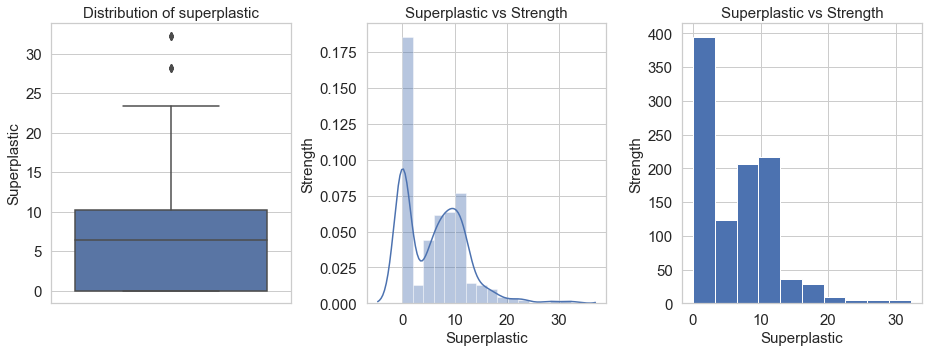

In [39]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='superplastic',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Superplastic', fontsize=15)
ax1.set_title('Distribution of superplastic', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['superplastic'],ax=ax2)
ax2.set_xlabel('Superplastic', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Superplastic vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['superplastic'])
ax3.set_xlabel('Superplastic', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Superplastic vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### Coarseagg

In [40]:
#Range of values observed

print('Range of values: ', concrete_df['coarseagg'].max()-concrete_df['coarseagg'].min())

Range of values:  344.0


In [41]:
#Central values

print('Minimum value: ', concrete_df['coarseagg'].min())
print('Maximum value: ',concrete_df['coarseagg'].max())
print('Mean value: ', concrete_df['coarseagg'].mean())
print('Median value: ',concrete_df['coarseagg'].median())
print('Standard deviation: ', concrete_df['coarseagg'].std())
print('Null values: ',concrete_df['coarseagg'].isnull().any())

Minimum value:  801.0
Maximum value:  1145.0
Mean value:  972.918932038835
Median value:  968.0
Standard deviation:  77.75395396672087
Null values:  False


In [42]:
#Quartiles

Q1=concrete_df['coarseagg'].quantile(q=0.25)
Q3=concrete_df['coarseagg'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['coarseagg']))

1st Quartile (Q1) is:  932.0
3st Quartile (Q3) is:  1029.4
Interquartile range (IQR) is  97.40000000000009


In [43]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in coarseagg: ', L_outliers)
print('Upper outliers in coarseagg: ', U_outliers)

Lower outliers in coarseagg:  785.8999999999999
Upper outliers in coarseagg:  1175.5000000000002


In [44]:
print('Number of outliers in coarseagg upper : ', concrete_df[concrete_df['coarseagg']>1175.5]['coarseagg'].count())
print('Number of outliers in coarseagg lower : ', concrete_df[concrete_df['coarseagg']<785.9]['coarseagg'].count())
print('% of Outlier in coarseagg upper: ',round(concrete_df[concrete_df['coarseagg']>1175.5]['coarseagg'].count()*100/len(concrete_df)), '%')
print('% of Outlier in coarseagg lower: ',round(concrete_df[concrete_df['coarseagg']<785.9]['coarseagg'].count()*100/len(concrete_df)), '%')

Number of outliers in coarseagg upper :  0
Number of outliers in coarseagg lower :  0
% of Outlier in coarseagg upper:  0.0 %
% of Outlier in coarseagg lower:  0.0 %


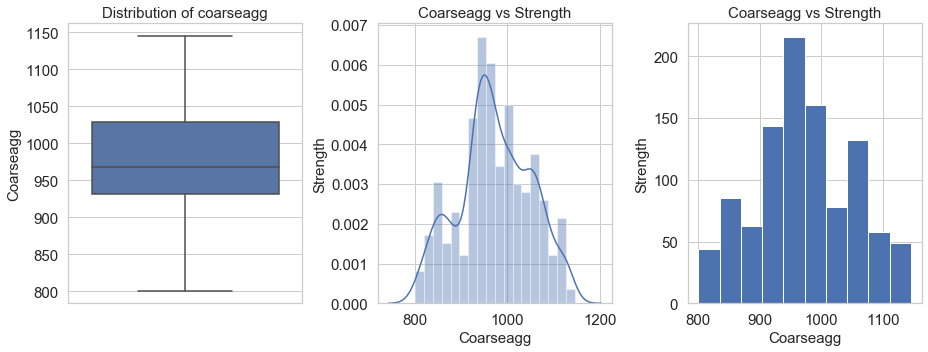

In [45]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='coarseagg',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Coarseagg', fontsize=15)
ax1.set_title('Distribution of coarseagg', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['coarseagg'],ax=ax2)
ax2.set_xlabel('Coarseagg', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Coarseagg vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['coarseagg'])
ax3.set_xlabel('Coarseagg', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Coarseagg vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### Fineagg

In [46]:
#Range of values observed

print('Range of values: ', concrete_df['fineagg'].max()-concrete_df['fineagg'].min())

Range of values:  398.6


In [47]:
#Central Values 

print('Minimum value: ', concrete_df['fineagg'].min())
print('Maximum value: ',concrete_df['fineagg'].max())
print('Mean value: ', concrete_df['fineagg'].mean())
print('Median value: ',concrete_df['fineagg'].median())
print('Standard deviation: ', concrete_df['fineagg'].std())
print('Null values: ',concrete_df['fineagg'].isnull().any())

Minimum value:  594.0
Maximum value:  992.6
Mean value:  773.5804854368932
Median value:  779.5
Standard deviation:  80.17598014240443
Null values:  False


In [48]:
#Quartiles

Q1=concrete_df['fineagg'].quantile(q=0.25)
Q3=concrete_df['fineagg'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['fineagg']))

1st Quartile (Q1) is:  730.9499999999999
3st Quartile (Q3) is:  824.0
Interquartile range (IQR) is  93.05000000000007


In [49]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in fineagg: ', L_outliers)
print('Upper outliers in fineagg: ', U_outliers)

Lower outliers in fineagg:  591.3749999999998
Upper outliers in fineagg:  963.575


In [50]:
print('Number of outliers in fineagg upper : ', concrete_df[concrete_df['fineagg']>963.575]['fineagg'].count())
print('Number of outliers in fineagg lower : ', concrete_df[concrete_df['fineagg']<591.37]['fineagg'].count())
print('% of Outlier in fineagg upper: ',round(concrete_df[concrete_df['fineagg']>963.575]['fineagg'].count()*100/len(concrete_df)), '%')
print('% of Outlier in fineagg lower: ',round(concrete_df[concrete_df['fineagg']<591.37]['fineagg'].count()*100/len(concrete_df)), '%')

Number of outliers in fineagg upper :  5
Number of outliers in fineagg lower :  0
% of Outlier in fineagg upper:  0.0 %
% of Outlier in fineagg lower:  0.0 %


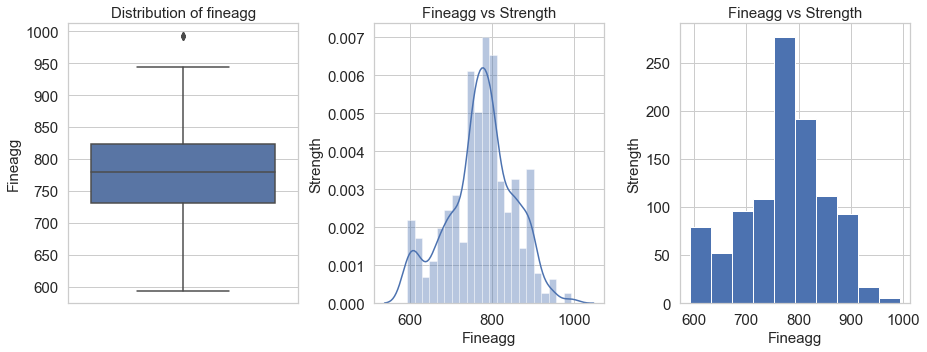

In [51]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='fineagg',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Fineagg', fontsize=15)
ax1.set_title('Distribution of fineagg', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['fineagg'],ax=ax2)
ax2.set_xlabel('Fineagg', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Fineagg vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['fineagg'])
ax3.set_xlabel('Fineagg', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Fineagg vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### Age

In [52]:
#Range of values observed

print('Range of values: ', concrete_df['age'].max()-concrete_df['age'].min())

Range of values:  364.0


In [53]:
#Central values

print('Minimum age: ', concrete_df['age'].min())
print('Maximum age: ',concrete_df['age'].max())
print('Mean value: ', concrete_df['age'].mean())
print('Median value: ',concrete_df['age'].median())
print('Standard deviation: ', concrete_df['age'].std())
print('Null values: ',concrete_df['age'].isnull().any())

Minimum age:  1.0
Maximum age:  365.0
Mean value:  45.662135922330094
Median value:  28.0
Standard deviation:  63.16991158103279
Null values:  False


In [54]:
#Quartiles

Q1=concrete_df['age'].quantile(q=0.25)
Q3=concrete_df['age'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['age']))

1st Quartile (Q1) is:  7.0
3st Quartile (Q3) is:  56.0
Interquartile range (IQR) is  49.0


In [55]:
#Outlier detection from Interquartile range (IQR) in original data
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in age: ', L_outliers)
print('Upper outliers in age: ', U_outliers)

Lower outliers in age:  -66.5
Upper outliers in age:  129.5


In [56]:
print('Number of outliers in age upper : ', concrete_df[concrete_df['age']>129.5]['age'].count())
print('Number of outliers in age lower : ', concrete_df[concrete_df['age']<-66.5]['age'].count())
print('% of Outlier in age upper: ',round(concrete_df[concrete_df['age']>129.5]['age'].count()*100/len(concrete_df)), '%')
print('% of Outlier in age lower: ',round(concrete_df[concrete_df['age']<-66.5]['age'].count()*100/len(concrete_df)), '%')

Number of outliers in age upper :  59
Number of outliers in age lower :  0
% of Outlier in age upper:  6.0 %
% of Outlier in age lower:  0.0 %


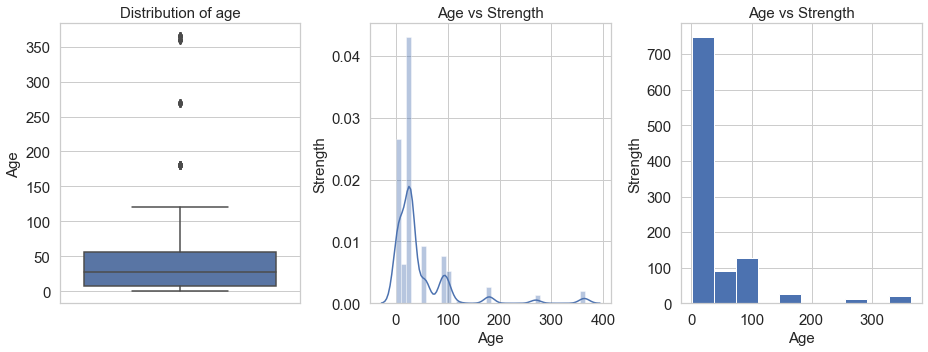

In [57]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='age',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Distribution of age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Age vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Age vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


#### Observation

1. 'cement' attribute have almost normal curve.
2. 'slag' has two gausssians and rightly skewed.It shows the presence of outlies.
3. 'ash' has two gaussians and rightly skewed.It shows the presence of outlies.
4. 'water' has atleast guassians and slighly left skewed.It shows the presence of outlies.
5. 'superplastic' has multiple gaussians and rightly skewed.It shows the presence of outlies.
6. 'coarseagg' has three guassians and almost normal.
7. 'fineagg' has almost two guassians and looks like normal.
8. 'age' has multiple guassians and rightly skewed. It shows the presence of outlies.
9. 'strength' is close to a normal curve.

The dataset does not have any missing values. The dataset has only outliers problem.


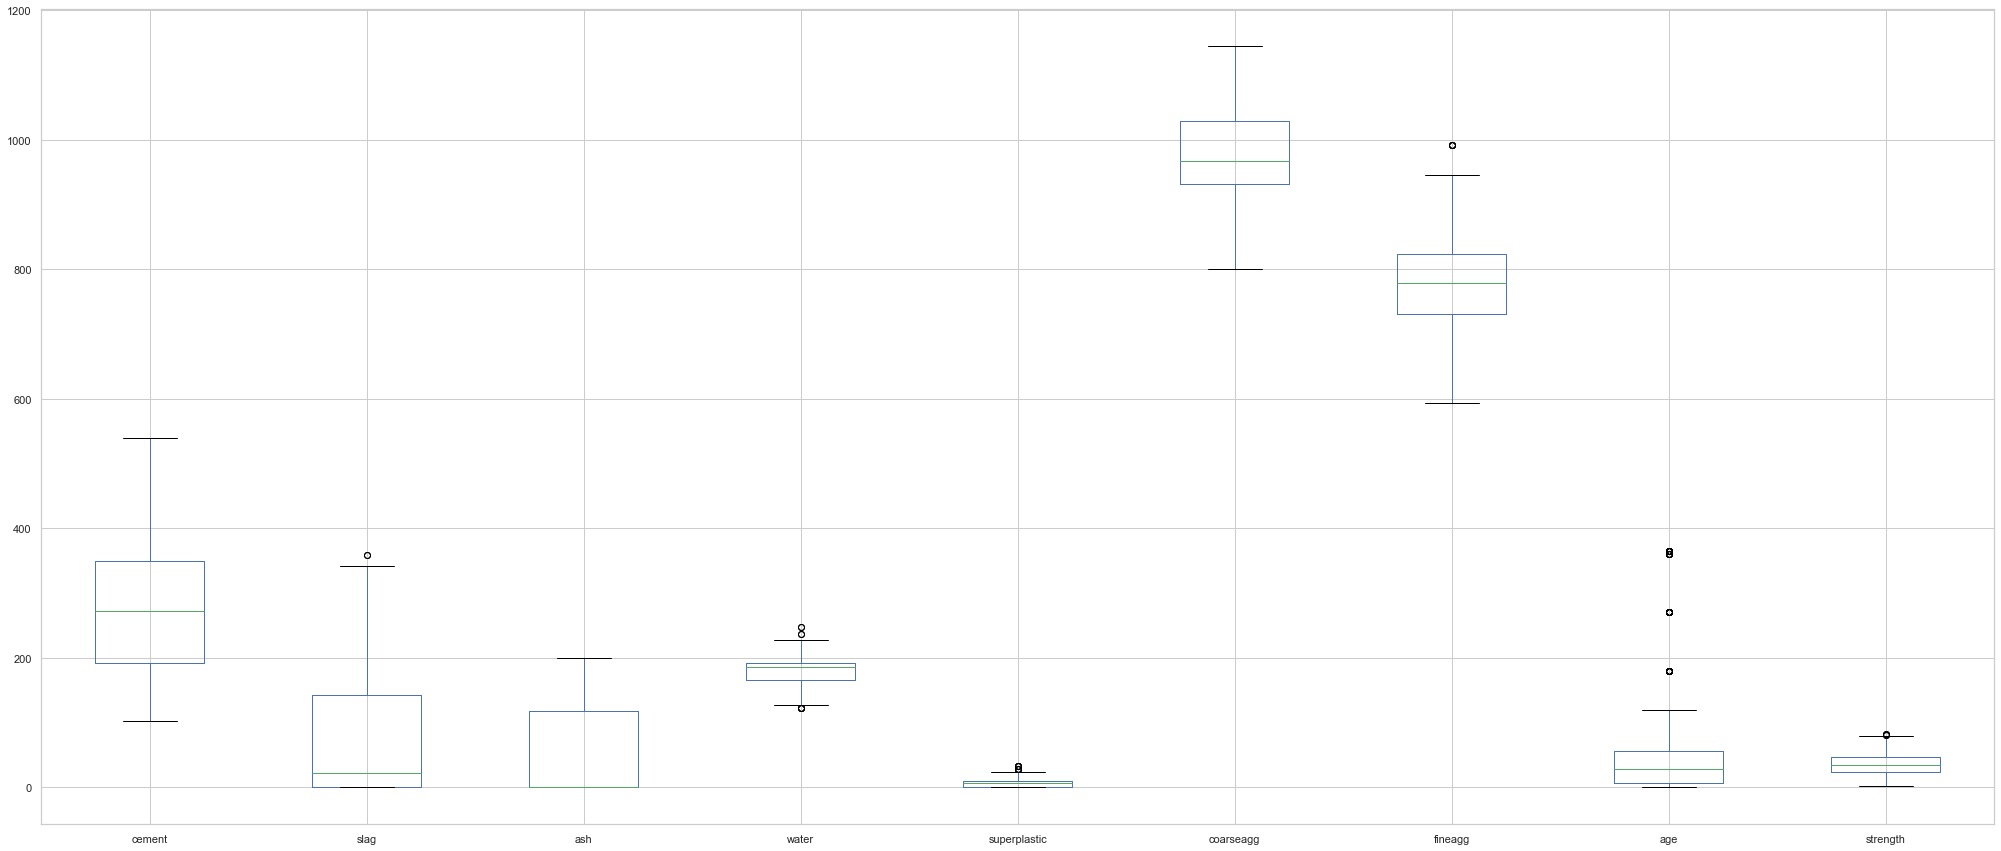

In [58]:
#Checking for outliers in the entire dataset
concrete_df1=concrete_df.copy()
concrete_df1.boxplot(figsize=(35,15))

In [59]:
#Number of outliers present in the dataset
print('Number of outliers in cement: ',concrete_df[((concrete_df1.cement - concrete_df1.cement.mean()) / concrete_df1.cement.std()).abs() >3]['cement'].count())
print('Number of outliers in slag: ',concrete_df1[((concrete_df1.slag - concrete_df1.slag.mean()) / concrete_df1.slag.std()).abs() >3]['slag'].count())
print('Number of outliers in ash: ',concrete_df1[((concrete_df1.ash - concrete_df1.ash.mean()) / concrete_df1.ash.std()).abs() >3]['ash'].count())
print('Number of outliers in water: ',concrete_df1[((concrete_df1.water - concrete_df1.water.mean()) / concrete_df1.water.std()).abs() >3]['water'].count())
print('Number of outliers in superplastic: ',concrete_df1[((concrete_df1.superplastic - concrete_df1.superplastic.mean()) / concrete_df1.superplastic.std()).abs() >3]['superplastic'].count())
print('Number of outliers in coarseagg: ',concrete_df1[((concrete_df1.coarseagg - concrete_df1.coarseagg.mean()) / concrete_df1.coarseagg.std()).abs() >3]['coarseagg'].count())
print('Number of outliers in fineagg: ',concrete_df1[((concrete_df1.fineagg - concrete_df1.fineagg.mean()) / concrete_df1.fineagg.std()).abs() >3]['fineagg'].count())
print('Number of outliers in age: ',concrete_df1[((concrete_df1.age - concrete_df1.age.mean()) / concrete_df1.age.std()).abs() >3]['age'].count())
print('Number of outliers in strength: ',concrete_df1[((concrete_df1.strength - concrete_df1.strength.mean()) / concrete_df1.strength.std()).abs() >3]['strength'].count())

Number of outliers in cement:  0
Number of outliers in slag:  4
Number of outliers in ash:  0
Number of outliers in water:  2
Number of outliers in superplastic:  10
Number of outliers in coarseagg:  0
Number of outliers in fineagg:  0
Number of outliers in age:  33
Number of outliers in strength:  0


In [60]:
#Handling the outliers

#Replacing the outliers by median
for col_name in concrete_df1.columns[:-1]:
    q1 = concrete_df1[col_name].quantile(0.25)
    q3 = concrete_df1[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    concrete_df1.loc[(concrete_df1[col_name] < low) | (concrete_df1[col_name] > high), col_name] = concrete_df1[col_name].median()

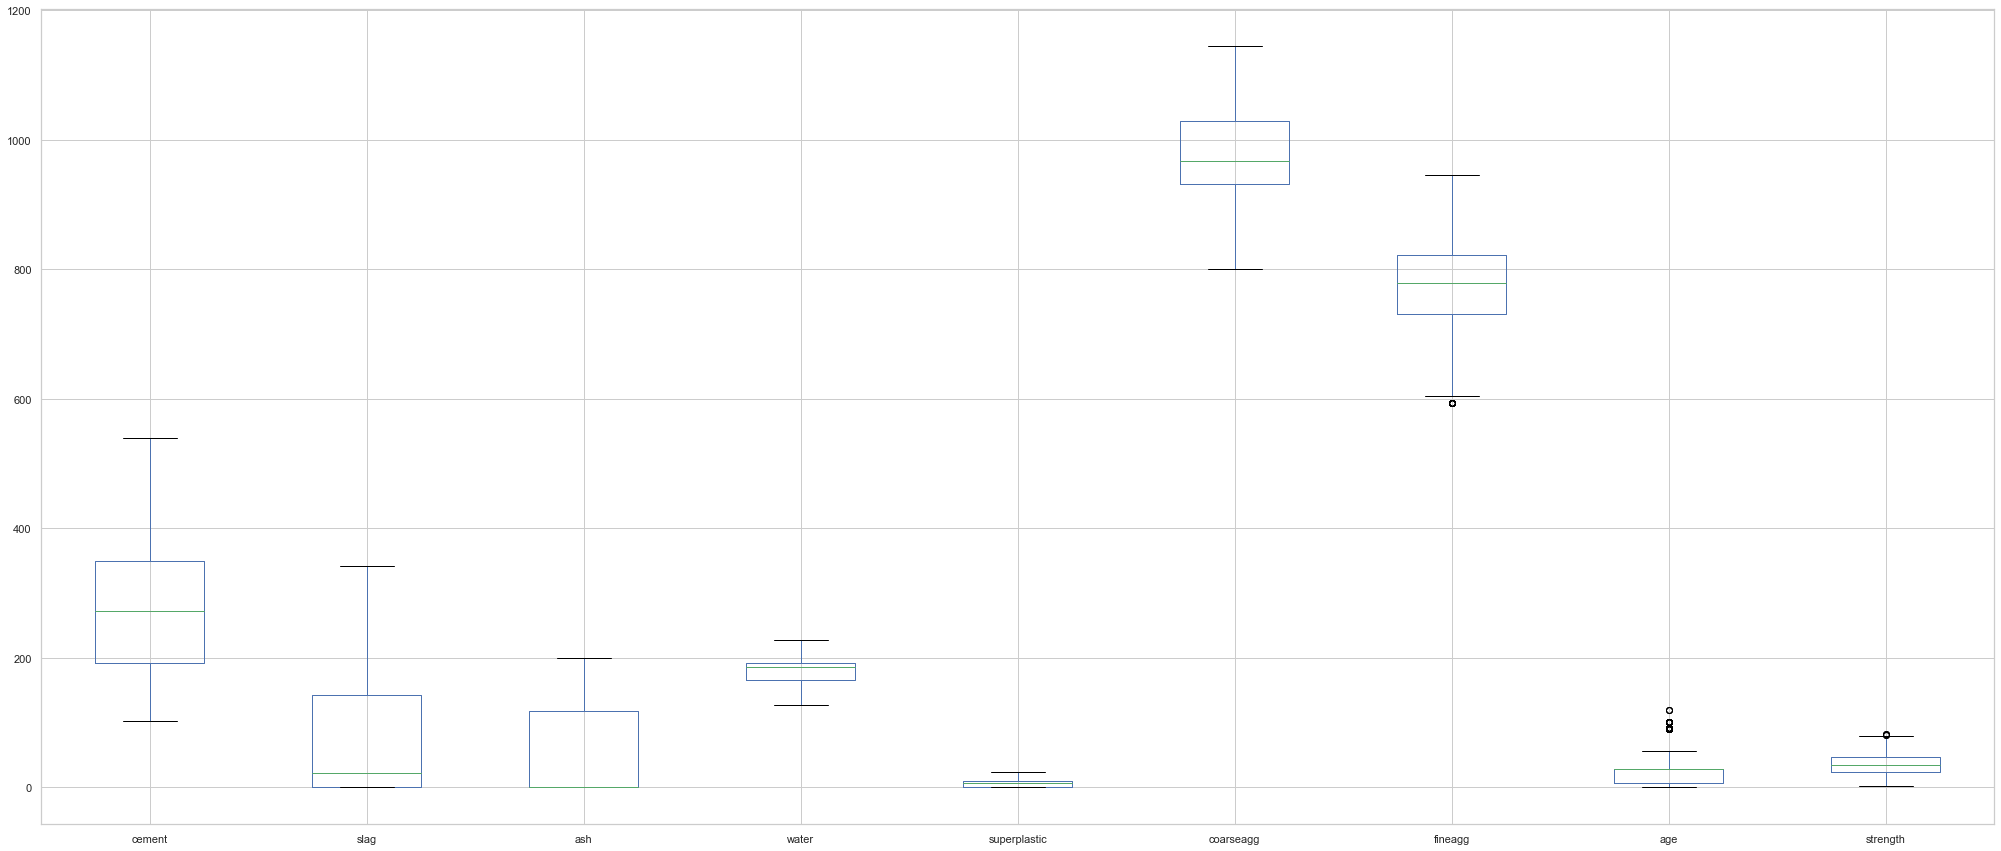

In [61]:
concrete_df1.boxplot(figsize=(35,15))

### MultiVariate Analysis

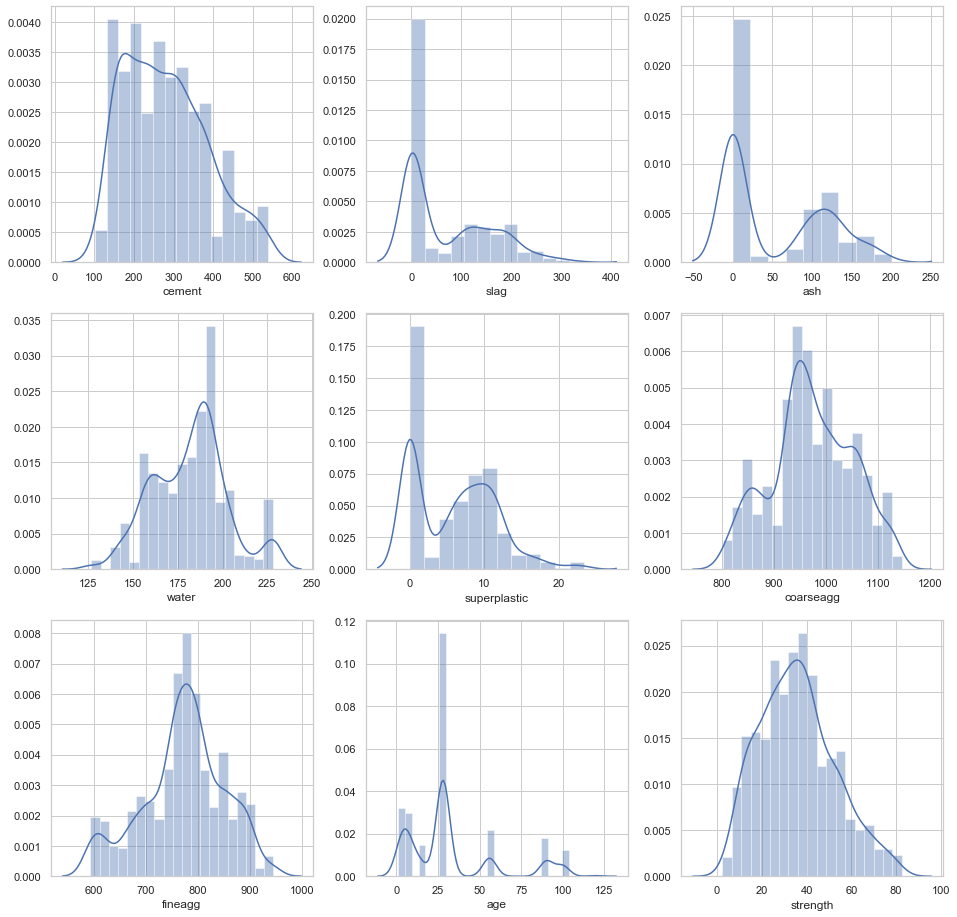

In [62]:
# Distplot
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(concrete_df1['cement'],ax=ax2[0][0])
sns.distplot(concrete_df1['slag'],ax=ax2[0][1])
sns.distplot(concrete_df1['ash'],ax=ax2[0][2])
sns.distplot(concrete_df1['water'],ax=ax2[1][0])
sns.distplot(concrete_df1['superplastic'],ax=ax2[1][1])
sns.distplot(concrete_df1['coarseagg'],ax=ax2[1][2])
sns.distplot(concrete_df1['fineagg'],ax=ax2[2][0])
sns.distplot(concrete_df1['age'],ax=ax2[2][1])
sns.distplot(concrete_df1['strength'],ax=ax2[2][2])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025CBA377128>,
      dtype=object)

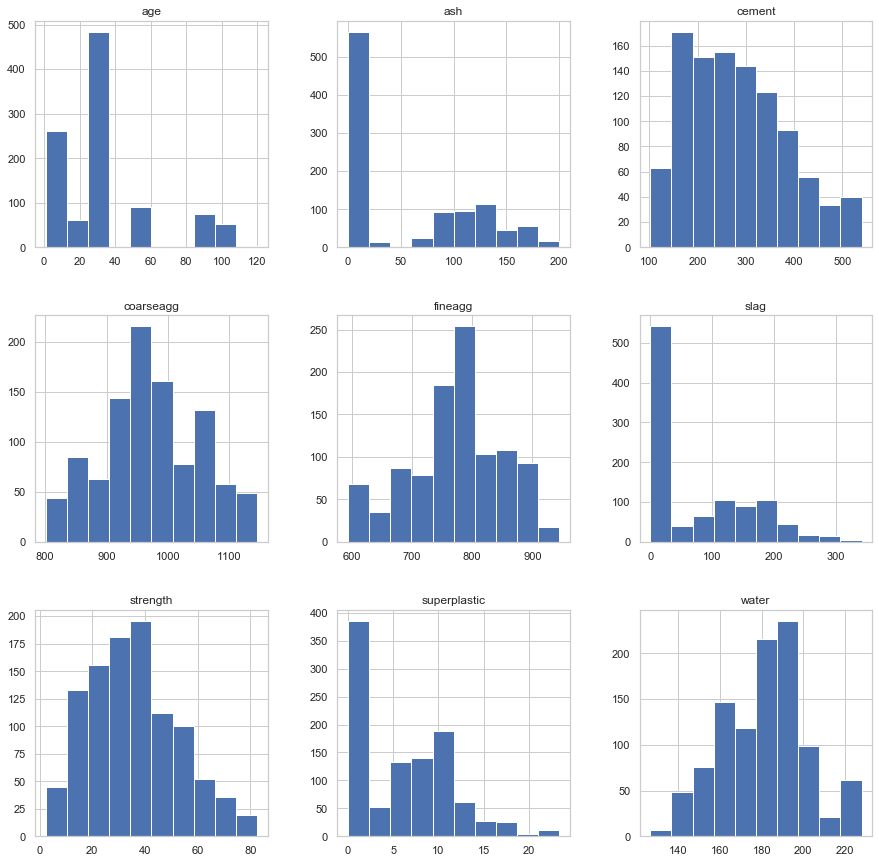

In [63]:
# Histogram
concrete_df1.hist(figsize=(15,15))

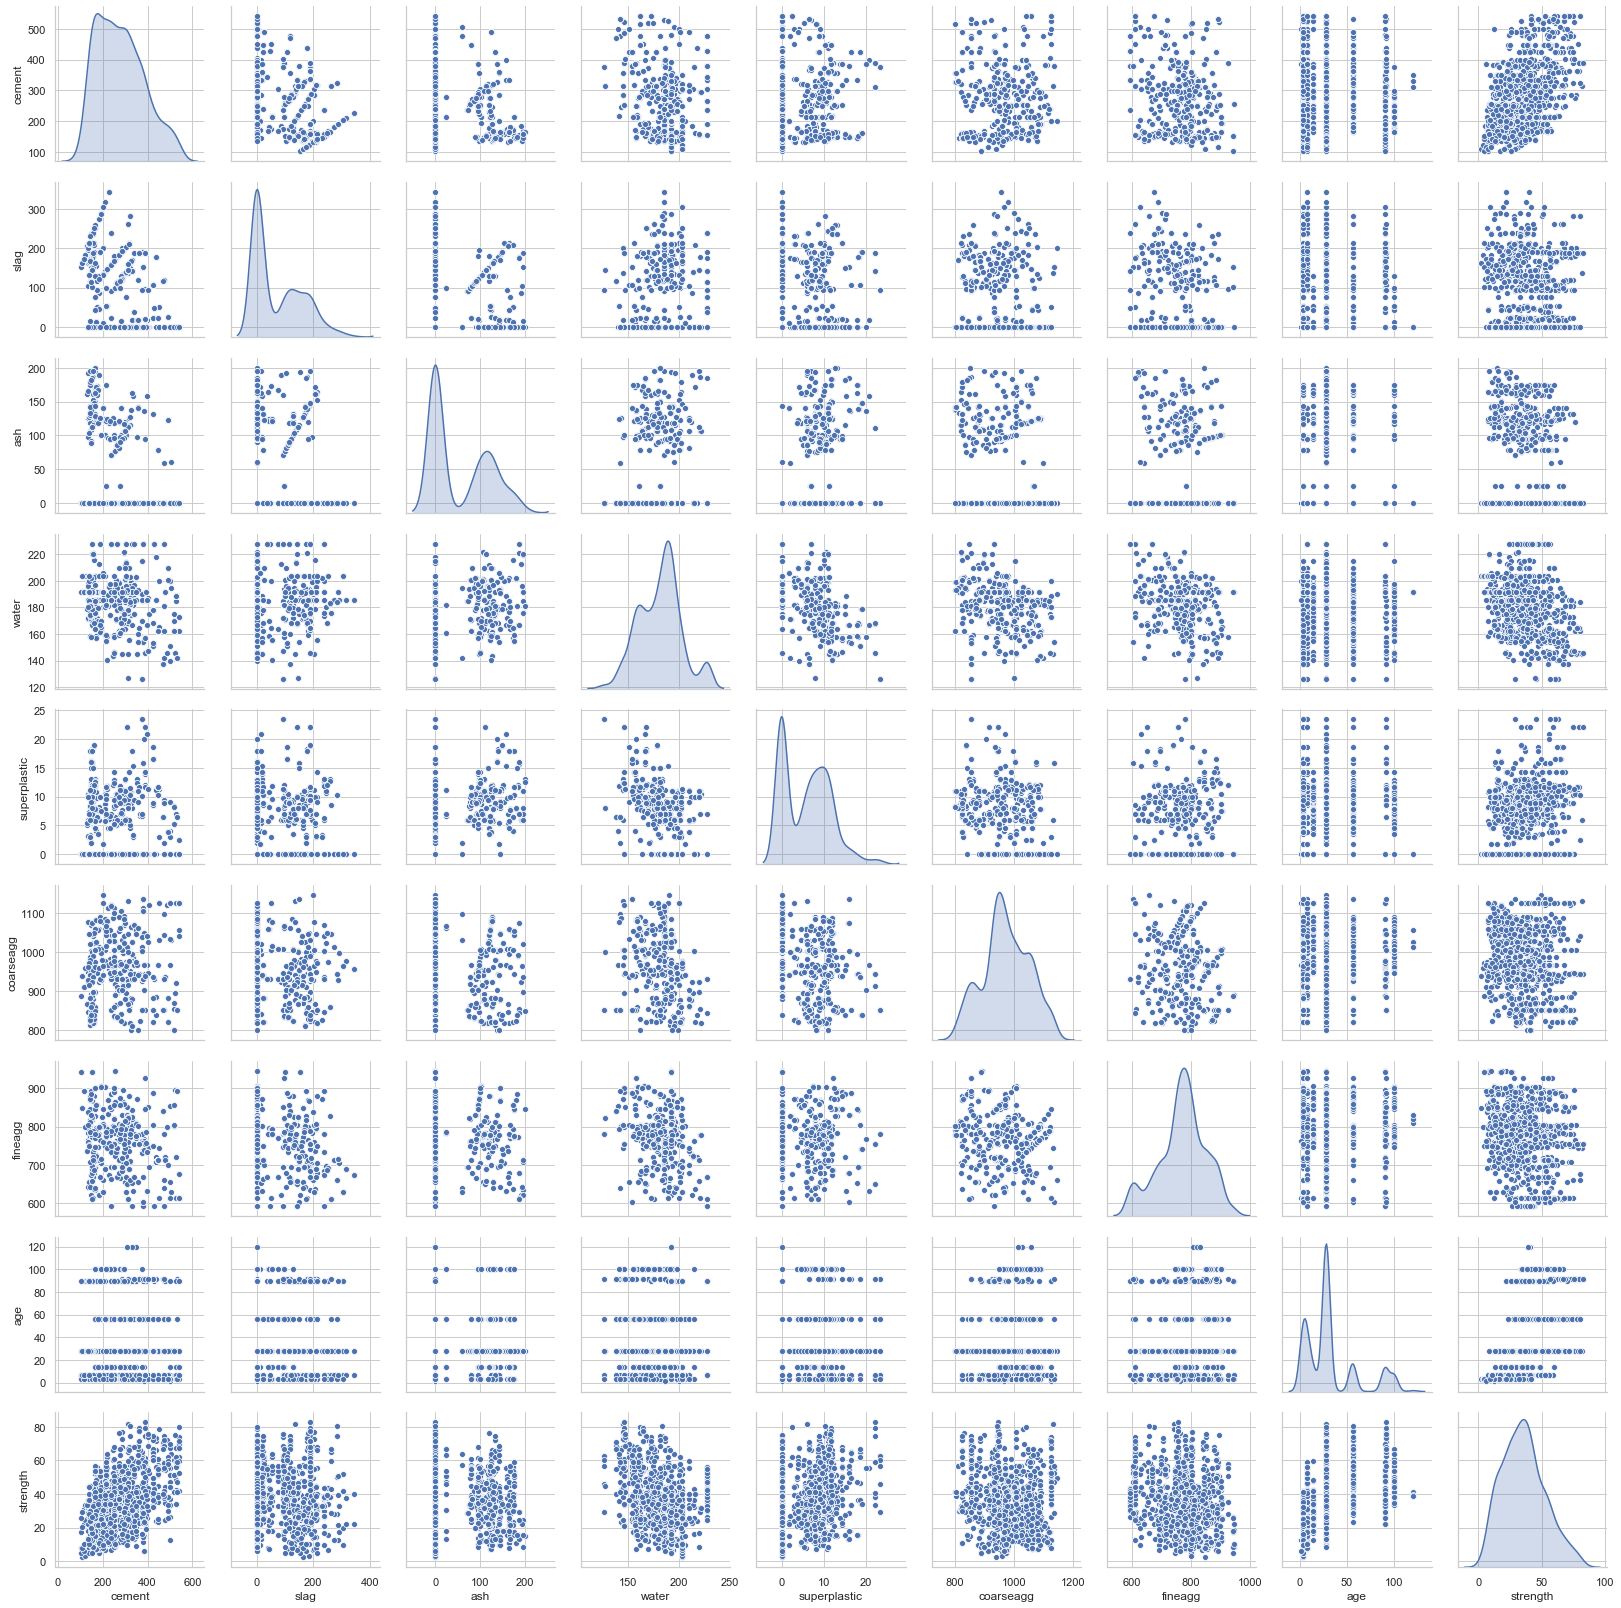

In [64]:
## pairplot- plot density curve instead of histogram in diagonal

sns.pairplot(concrete_df1, diag_kind='kde')

In [65]:
# corrlation matrix 
cor=concrete_df1.corr()
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275046,-0.397467,-0.091614,0.013336,-0.109349,-0.238698,-0.031962,0.497832
slag,-0.275046,1.000000,-0.320468,0.098880,0.061195,-0.283882,-0.282383,-0.028971,0.137800
ash,-0.397467,-0.320468,1.000000,-0.248011,0.447492,-0.009961,0.091729,0.057928,-0.105755
water,-0.091614,0.098880,-0.248011,1.000000,-0.658056,-0.156928,-0.426299,-0.040304,-0.307711
superplastic,0.013336,0.061195,0.447492,-0.658056,1.000000,-0.224503,0.156591,0.062013,0.346260
coarseagg,-0.109349,-0.283882,-0.009961,-0.156928,-0.224503,1.000000,-0.161377,0.018078,-0.164935
fineagg,-0.238698,-0.282383,0.091729,-0.426299,0.156591,-0.161377,1.000000,0.051532,-0.182186
age,-0.031962,-0.028971,0.057928,-0.040304,0.062013,0.018078,0.051532,1.000000,0.499850
strength,0.497832,0.137800,-0.105755,-0.307711,0.346260,-0.164935,-0.182186,0.499850,1.000000


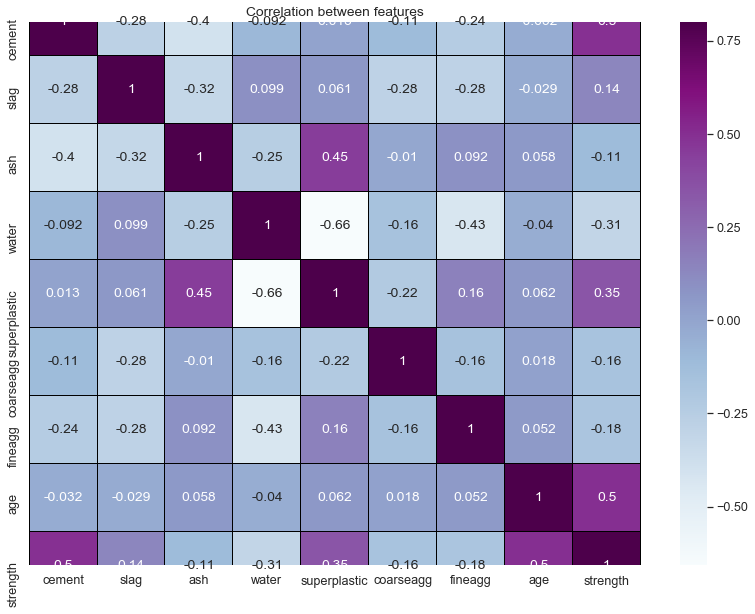

In [68]:
#heatmap
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(cor, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap="BuPu",linecolor="black")
plt.title('Correlation between features');


#### Off Diagonal Analysis: Relationship between indpendent attributes

##### Scatter plots

###### cement vs other independent attributes:
This attribute does not have any significant relation with slag, ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
###### slag vs other independent attributes: 
This attribute also does not have any significant relation with ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
###### ash vs other independent attributes: 
This attribute also does not have any significant relation with water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
###### water vs other independent attributes: 
This attribute have negative linear relationship with superplastic and fineagg. It does not have any significant relationship with other independent atributes. This is true as Superplasticizers allows the reduction of water in the concrete upto the extent of 30% without reducing the workability.
###### superplastic vs other independent attributes:
This attribute have negative linear relationship with water only. It does not have any significant relationship with other independent attributes.
###### coarseagg vs other independent attributes:
This attribute also does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
###### fineagg vs other independent attributes:
It has negative linear relationship with water. It does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

The reason for performing this analysis is to find dimensions which are very strongly correlated i.e. r value is close to 1 or -1.  Dimensions that give same information to the algorithm, are redundant. In such cases we may want to keep one and drop the other. It would be wise to drop the diemnsion that is prone to errors. We can also choose to combine these dimensions and create a composite dimension out of it.

We will study the relationship of the 'strength' attribute with other attributes


###### strength vs cement: 
It is linearly related to the cement. The relationship is positive and we can see that for a given value of cement we have a multiple values of strength. Though it has positive relationship with the strength, cement is not a very good predictor. 

###### strength vs slag: 
There is no particular trend. 

###### strength vs ash: 
There is no particular trend.

###### strength vs age: 
For a given value of age, we have different values of strength. Hence, It is not a good predictor. 

###### strength vs superplastic:
For a given value of age, we have different values of strength. Hence, It is not a good predictor. 

Other attributes does not give any strong relationship with strength. Hence, we can see that none of the independent attributes are a good predictors of the strength attribute. There is a no linear relationship between them.

Looking at the trend above we will not favour a Linear model.

### Feature Engineering, Model Building and Model Tuning

In [67]:
#Scaling the features

concrete_df_z = concrete_df1.apply(zscore)
concrete_df_z=pd.DataFrame(concrete_df_z,columns=concrete_df.columns)

Here, all the attributes are in the same scale(unit) except the age attribute. Hence, we are scaling the attributes. We are using zscore for scaling.

In [69]:
#Splitting the data into independent and dependent attributes

#independent and dependent variables
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]

In [70]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

#### DecisionTree Regression

In [71]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [72]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.352365
slag          0.094330
ash           0.011233
water         0.129045
superplastic  0.016779
coarseagg     0.035018
fineagg       0.032618
age           0.328612


#### Observations
Cement, age and water are significant attributes.
Here, ash, coarseagg, fineagg, superplastic and slag are the less significant variables.These will impact less to the strength column. 
This is also evident from the pairplot also.

In [73]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.9917907393004437
Performance on testing data using DT: 0.848493753726122
Accuracy DT:  0.848493753726122
MSE:  0.1581513392257413


###### There is a overfitting in the model as the dataset is performing 99% accurately in trainnig data. However, the accuracy on test data drops.

C:\Users\prono\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


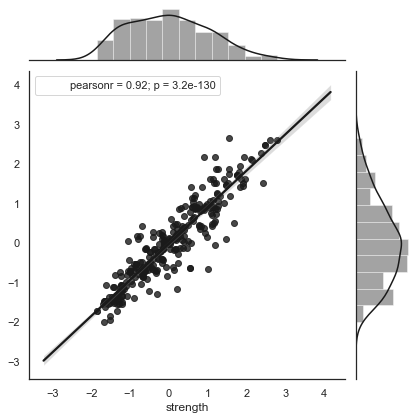

In [74]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [75]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT},index={'1'})
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.848494


###### K fold cross validation

In [76]:
num_folds = 18
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.867165684806905
Standard Deviation:  0.04395014604068307


In [77]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree k fold'], 'accuracy': [accuracy]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.848494
2,Decision Tree k fold,0.867166


Iteration 2

Drop the least significant variable

In [78]:
concrete_df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null float64
strength        1030 non-null float64
dtypes: float64(9)
memory usage: 72.5 KB


In [79]:
#Create a copy of the dataset
concrete_df2=concrete_df_z.copy()

In [80]:
#independent and dependent variable
X = concrete_df2.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = concrete_df2['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [81]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [82]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.368291
slag          0.107080
water         0.162754
superplastic  0.032941
age           0.328935


In [83]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

Performance on training data using DT: 0.991045963372976
Performance on testing data using DT: 0.844771278279582
Accuracy DT:  0.844771278279582


The acuracy on testing dataset is not improved, still it is an overfit model.

C:\Users\prono\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


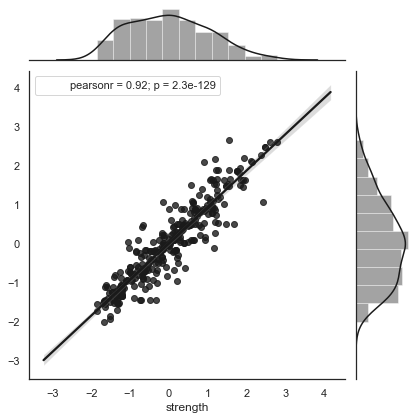

In [84]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [85]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree2'], 'accuracy': [acc_DT]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.848494
2,Decision Tree k fold,0.867166
3,Decision Tree2,0.844771


Regularising/Pruning of Decision Tree

In [86]:
#independent and dependent variables
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [87]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [88]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.416953
slag          0.025822
ash           0.000000
water         0.135128
superplastic  0.017987
coarseagg     0.000000
fineagg       0.007793
age           0.396318


Here, we can see that ash,coarseagg and fineagg are least significant variable.

Visualizing the Regularized Tree

In [89]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import graphviz
import pydot
concrete1_df=concrete_df_z
xvar = concrete1_df.drop('strength', axis=1)
feature_cols = xvar.columns

C:\Users\prono\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


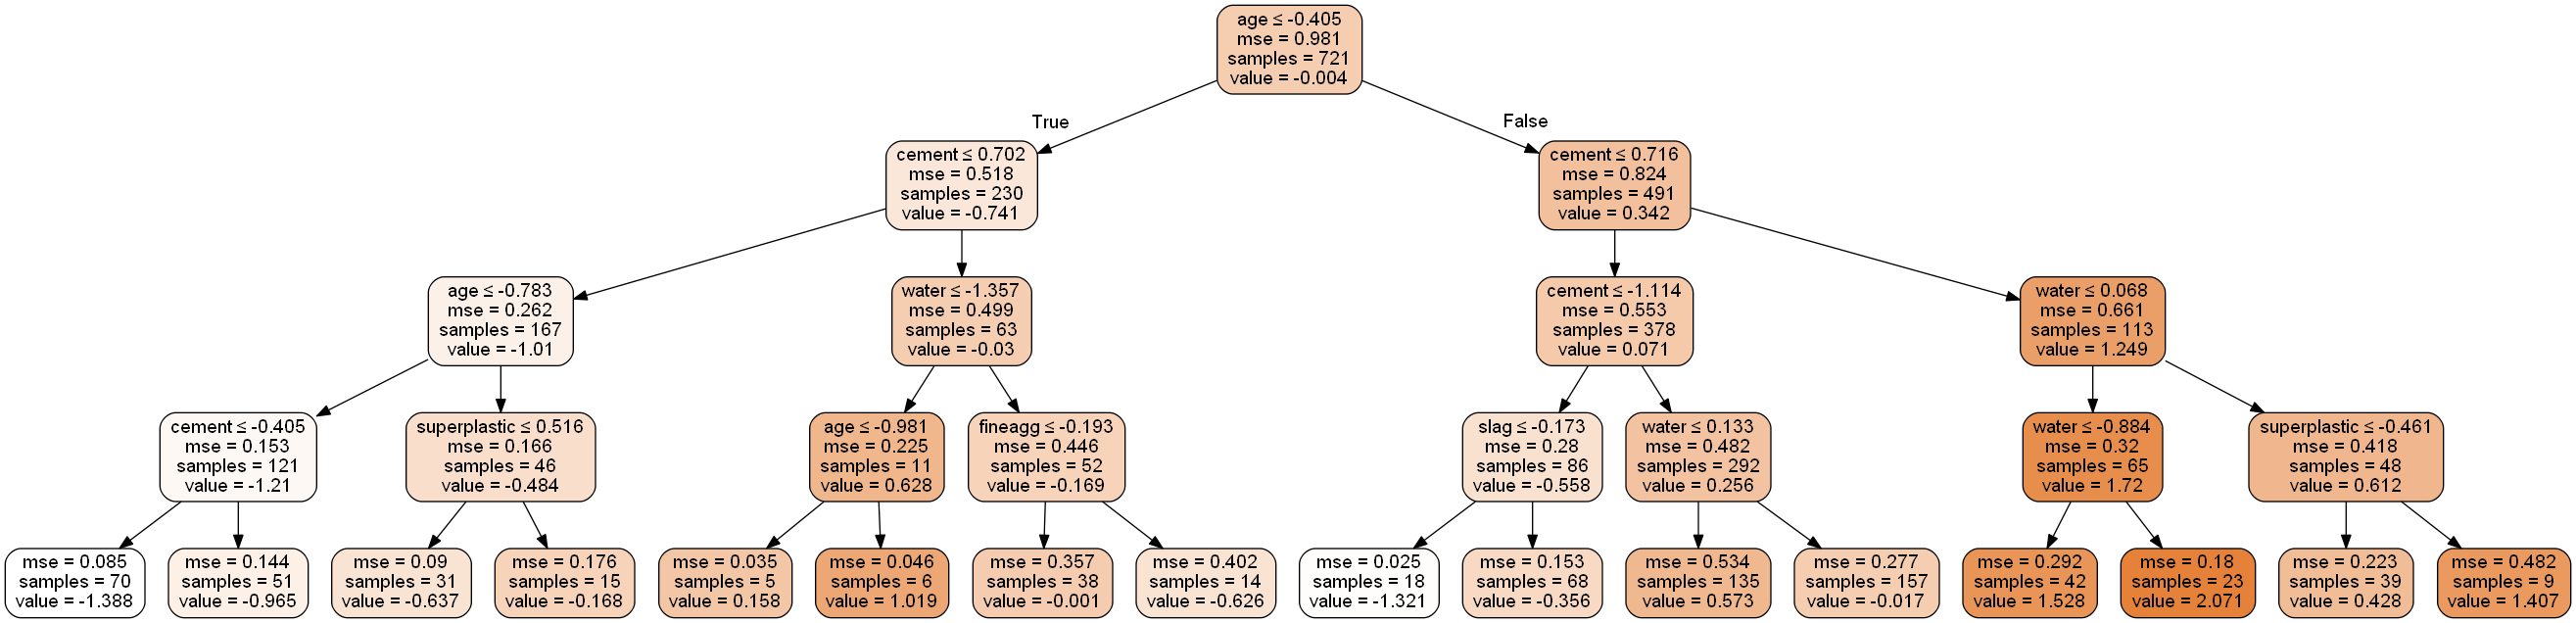

In [96]:
dot_data = StringIO()
export_graphviz(reg_dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('concrete_pruned.png')
Image(graph.create_png())

In [90]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))


Performance on training data using DT: 0.7255811799299218
Performance on testing data using DT: 0.6548277186105129
Accuracy DT:  0.6548277186105129
MSE:  0.36031160369896825


In [91]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'accuracy': [acc_RDT]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.848494
2,Decision Tree k fold,0.867166
3,Decision Tree2,0.844771
4,Pruned Decision Tree,0.654828


#### K fold cross validation

In [92]:
num_folds = 18
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(reg_dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6745523114433877
Standard Deviation:  0.08608318690710857


In [93]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree k fold'], 'accuracy': [accuracy]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.848494
2,Decision Tree k fold,0.867166
3,Decision Tree2,0.844771
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552


##### Iteration2

In [94]:
#Create a copy of the dataset
concrete_df3=concrete_df_z.copy()

In [95]:
#independent and dependent variable
X = concrete_df3.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = concrete_df3['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [96]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [97]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7249584363084667
Performance on testing data using DT: 0.6634677033758938
Accuracy DT:  0.6634677033758938
MSE:  0.35129266754854116


In [98]:
#Store the accuracy results for each model in a dataframe for finalcomparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree2'], 'accuracy': [acc_RDT]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.848494
2,Decision Tree k fold,0.867166
3,Decision Tree2,0.844771
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468


#### K Means Clustering

In [99]:
cluster_range = range( 1, 15 )  
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(concrete_df1)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3.709976e+07
1,2,2.774842e+07
2,3,2.141088e+07
3,4,1.868905e+07
4,5,1.677555e+07
5,6,1.474058e+07
6,7,1.373221e+07
7,8,1.230167e+07
8,9,1.139263e+07
9,10,1.068747e+07


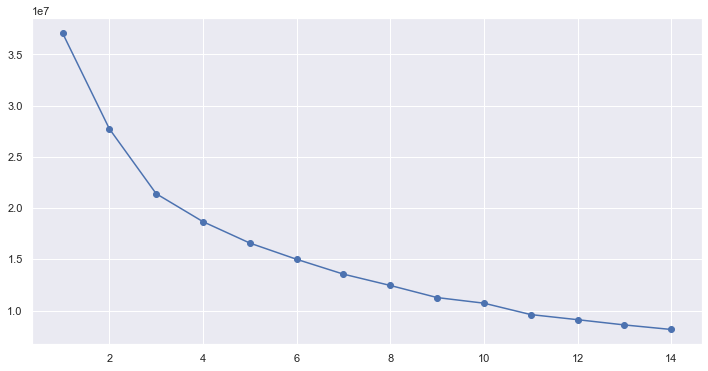

In [108]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [100]:
# k=6
cluster = KMeans( n_clusters = 6, random_state = 2354 )
cluster.fit(concrete_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2354, tol=0.0001, verbose=0)

In [101]:
# Creating a new column "GROUP" which will hold the cluster id of each record
prediction=cluster.predict(concrete_df_z)
concrete_df_z["GROUP"] = prediction     
# Creating a mirror copy for later re-use instead of building repeatedly
concrete_df_z_copy = concrete_df_z.copy(deep = True)


In [102]:
centroids = cluster.cluster_centers_
centroids

array([[-0.52847035,  0.25047012,  1.10117943,  0.4707871 ,  0.51065443,
        -1.14464266, -0.34207299, -0.2243148 , -0.27815339],
       [-0.60282287, -0.65663952,  1.10691052, -0.61327163,  0.49168022,
         0.62337539,  0.43508059,  0.27502291, -0.13528454],
       [ 0.3112026 , -0.83641215, -0.78154411,  0.44337009, -1.00073639,
         0.49854218,  0.39671798, -0.24628184, -0.68238245],
       [-0.87010755,  1.41482728, -0.84485042,  0.60549346, -0.75810292,
        -0.0430217 , -0.16744124, -0.16350135, -0.56135812],
       [ 1.00454194,  0.50203623, -0.51368191, -1.01583295,  1.02698603,
        -0.6014763 ,  0.15987254,  0.07455196,  1.1935206 ],
       [ 1.45045591, -0.42924132, -0.69489669,  1.30649175, -1.00149369,
         0.19438938, -1.65956143,  0.15842921,  0.70494449]])

In [103]:
centroid_df = pd.DataFrame(centroids, columns = list(concrete_df1) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-0.528470,0.250470,1.101179,0.470787,0.510654,-1.144643,-0.342073,-0.224315,-0.278153
1,-0.602823,-0.656640,1.106911,-0.613272,0.491680,0.623375,0.435081,0.275023,-0.135285
2,0.311203,-0.836412,-0.781544,0.443370,-1.000736,0.498542,0.396718,-0.246282,-0.682382
3,-0.870108,1.414827,-0.844850,0.605493,-0.758103,-0.043022,-0.167441,-0.163501,-0.561358
4,1.004542,0.502036,-0.513682,-1.015833,1.026986,-0.601476,0.159873,0.074552,1.193521
5,1.450456,-0.429241,-0.694897,1.306492,-1.001494,0.194389,-1.659561,0.158429,0.704944


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025CC10B20F0>,
      dtype=object)

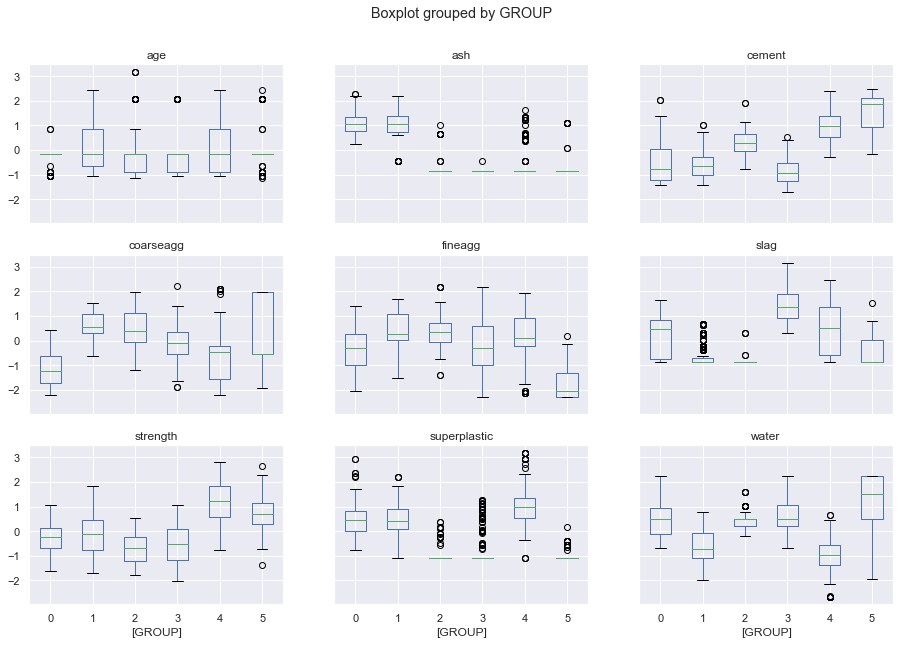

In [104]:
## Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
## centroids and the data in the cluster into box plots.
import matplotlib.pylab as plt
concrete_df_z.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

Here, None of the dimensions are good predictor of target variable.

For all the dimensions (variables) every cluster have a similar range of values except in one case.

We can see that the body of the cluster are overlapping.

So in k means, though, there are clusters in datasets on different dimensions. But we can not see any distinct characteristics of these clusters which tell us to break data into different clusters and build separate models for them.

In [105]:
#independent and dependent variables
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

#### Random Forest

In [106]:
model=RandomForestRegressor()
model.fit(X_train, y_train)

C:\Users\prono\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [107]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using RFR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using RFR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RFR: 0.9745581249229954
Performance on testing data using RFR: 0.8903819278856525
Accuracy DT:  0.8903819278856525
MSE:  0.11442594173239036


This model is also overfit.

In [108]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'accuracy': [acc_RFR]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.848494
2,Decision Tree k fold,0.867166
3,Decision Tree2,0.844771
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.890382


##### K fold cross validation

In [109]:
num_folds = 20
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8948701483444402
Standard Deviation:  0.03821130078569387


In [110]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor k fold'], 'accuracy': [accuracy]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.848494
2,Decision Tree k fold,0.867166
3,Decision Tree2,0.844771
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.890382
8,Random Forest Regressor k fold,0.894870


#### Gradient Boosting Regressor

In [111]:
model=GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [112]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_GBR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_GBR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9430469892492805
Performance on testing data using GBR: 0.8922111137117541
Accuracy DT:  0.8922111137117541
MSE:  0.11251652746594637


In [113]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor'], 'accuracy': [acc_GBR]},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.848494
2,Decision Tree k fold,0.867166
3,Decision Tree2,0.844771
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.890382
8,Random Forest Regressor k fold,0.894870
9,Gradient Boost Regressor,0.892211


##### K fold cross validation

In [114]:
num_folds = 20
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8998321576705118
Standard Deviation:  0.02677301484351542


In [115]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor k fold'], 'accuracy': [accuracy]},index={'10'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.848494
2,Decision Tree k fold,0.867166
3,Decision Tree2,0.844771
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.890382
8,Random Forest Regressor k fold,0.894870
9,Gradient Boost Regressor,0.892211
10,Gradient Boost Regressor k fold,0.899832


#### Ada Boosting Regressor

In [116]:
model=AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [117]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_ABR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_ABR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.8109866214551966
Performance on testing data using GBR: 0.7476321355479212
Accuracy DT:  0.7476321355479212
MSE:  0.2634367672768229


In [118]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor'], 'accuracy': [acc_ABR]},index={'11'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.848494
2,Decision Tree k fold,0.867166
3,Decision Tree2,0.844771
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.890382
8,Random Forest Regressor k fold,0.894870
9,Gradient Boost Regressor,0.892211
10,Gradient Boost Regressor k fold,0.899832


##### K fold cross validation

In [119]:
num_folds = 18
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7835357441641143
Standard Deviation:  0.03453673016790768


In [129]:
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor k fold'], 'accuracy': [accuracy]},index={'12'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.842414
2,Decision Tree k fold,0.868511
3,Decision Tree2,0.838213
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.884657
8,Random Forest Regressor k fold,0.901000
9,Gradient Boost Regressor,0.891974
10,Gradient Boost Regressor k fold,0.899916


#### Bagging Regressor

In [120]:
model=BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [121]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_BR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_BR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9715749448668548
Performance on testing data using GBR: 0.8883416702028367
Accuracy DT:  0.8883416702028368
MSE:  0.11655568550757187


In [122]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 'accuracy': [acc_BR]},index={'13'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.848494
2,Decision Tree k fold,0.867166
3,Decision Tree2,0.844771
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.890382
8,Random Forest Regressor k fold,0.894870
9,Gradient Boost Regressor,0.892211
10,Gradient Boost Regressor k fold,0.899832


##### K fold cross validation

In [123]:
num_folds = 20
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.9023129048598151
Standard Deviation:  0.0286169371366333


In [124]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor k fold'], 'accuracy': [accuracy]},index={'14'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.848494
2,Decision Tree k fold,0.867166
3,Decision Tree2,0.844771
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.890382
8,Random Forest Regressor k fold,0.894870
9,Gradient Boost Regressor,0.892211
10,Gradient Boost Regressor k fold,0.899832


#### KNN Regressor

In [125]:
error=[]
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean error')

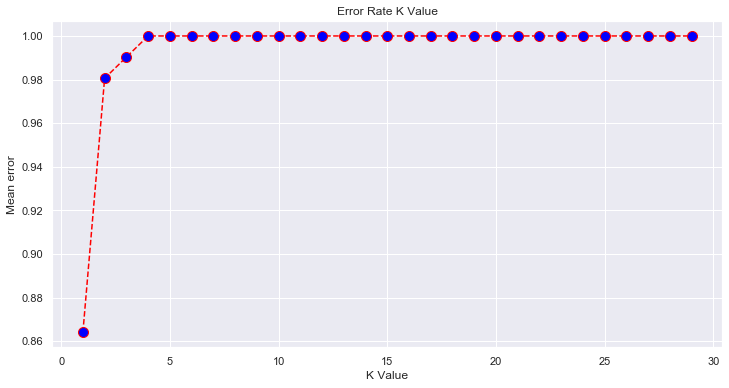

In [126]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [127]:
#k=3
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [128]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using KNNR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using KNNR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_K=metrics.r2_score(y_test, y_pred)
print('Accuracy KNNR: ',acc_K)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using KNNR: 0.8902196318573777
Performance on testing data using KNNR: 0.8078817663272165
Accuracy KNNR:  0.8078817663272165
MSE:  0.20054457616295157


In [129]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor'], 'accuracy': [acc_K]},index={'15'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.848494
2,Decision Tree k fold,0.867166
3,Decision Tree2,0.844771
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.890382
8,Random Forest Regressor k fold,0.894870
9,Gradient Boost Regressor,0.892211
10,Gradient Boost Regressor k fold,0.899832


##### K fold cross validation

In [130]:
num_folds = 30
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.791265681749521
Standard Deviation:  0.06617056736946313


In [131]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor k fold'], 'accuracy': [accuracy]},index={'16'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.848494
2,Decision Tree k fold,0.867166
3,Decision Tree2,0.844771
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.890382
8,Random Forest Regressor k fold,0.894870
9,Gradient Boost Regressor,0.892211
10,Gradient Boost Regressor k fold,0.899832


#### Support Vector Regressor

In [132]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [133]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using SVR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using SVR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_S=metrics.r2_score(y_test, y_pred)
print('Accuracy SVR: ',acc_S)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using SVR: 0.7195312919938222
Performance on testing data using SVR: 0.6932035001931365
Accuracy SVR:  0.6932035001931365
MSE:  0.32025265299303374


In [134]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Support Vector Regressor'], 'accuracy': [acc_S]},index={'17'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.848494
2,Decision Tree k fold,0.867166
3,Decision Tree2,0.844771
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.890382
8,Random Forest Regressor k fold,0.894870
9,Gradient Boost Regressor,0.892211
10,Gradient Boost Regressor k fold,0.899832


##### K fold cross validation

In [135]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6971192327136142
Standard Deviation:  0.036742110058929286


In [136]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVR k fold'], 'accuracy': [accuracy]},index={'18'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.848494
2,Decision Tree k fold,0.867166
3,Decision Tree2,0.844771
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.890382
8,Random Forest Regressor k fold,0.894870
9,Gradient Boost Regressor,0.892211
10,Gradient Boost Regressor k fold,0.899832


#### Ensemeble KNN Regressor, SVR, LR

In [137]:
#Multiple model Ensemble
from sklearn import svm
LR=LinearRegression()
KN=KNeighborsRegressor(n_neighbors=3)
SVM=svm.SVR(kernel='linear')

In [138]:
evc=VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
evc.fit(X_train, y_train)

VotingRegressor(estimators=[('LR',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('KN',
                             KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=3,
                                                 p=2, weights='uniform')),
                            ('SVM',
                             SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='linear', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False))],
                n_jobs=None, weights=None)

In [139]:
y_pred = evc.predict(X_test)
# performance on train data
print('Performance on training data using ensemble:',evc.score(X_train,y_train))
# performance on test data
print('Performance on testing data using ensemble:',evc.score(X_test,y_test))
#Evaluate the model using accuracy
acc_E=metrics.r2_score(y_test, y_pred)
print('Accuracy ensemble: ',acc_E)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using ensemble: 0.8213604308836657
Performance on testing data using ensemble: 0.7849191766894734
Accuracy ensemble:  0.7849191766894734
MSE:  0.22451430937603256


In [140]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble'], 'accuracy': [acc_E]},index={'19'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.848494
2,Decision Tree k fold,0.867166
3,Decision Tree2,0.844771
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.890382
8,Random Forest Regressor k fold,0.894870
9,Gradient Boost Regressor,0.892211
10,Gradient Boost Regressor k fold,0.899832


##### K fold cross validation

In [141]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(evc,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7803291490734494
Standard Deviation:  0.029918532582796722


In [142]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble k fold'], 'accuracy': [accuracy]},index={'20'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.848494
2,Decision Tree k fold,0.867166
3,Decision Tree2,0.844771
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.890382
8,Random Forest Regressor k fold,0.894870
9,Gradient Boost Regressor,0.892211
10,Gradient Boost Regressor k fold,0.899832


#### Observation

After applying all the models we can see that Random Forest Regressor, Random Forest Regressor k fold, Gradient Boost Regressor, Gradient Boost Regressor k fold, Bagging Regressor and Bagging Regressor k fold are giving better results as compared to other models.

Now as the dataset has different gaussians, we can apply k means clustering and then we can apply the models and compare the accuracy.

#### Bootstrap Sampling

In [143]:
concrete_XY = X.join(y)

#### Using Gradient Boosting Regressor

In [144]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(concrete_df_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    gbmTree = GradientBoostingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , y_test)
    predictions = gbmTree.predict(test[:, :-1])  

    stats.append(score)

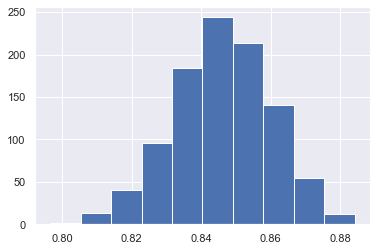

95.0 confidence interval 81.7% and 87.3%


In [155]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#### Using Random Forest Regressor

In [145]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(concrete_df_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    rfTree = RandomForestRegressor(n_estimators=100)
    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])  

    stats.append(score)

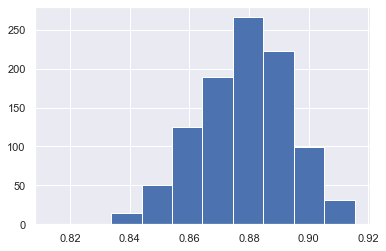

95.0 confidence interval 84.7% and 90.6%


In [157]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#### Observation

The bootstrap random forest classification model performance is between 84.7%-90.6% which is better than other classification algorithms.

### Closing Comments:
    
We have seen how EDA Tecniques can help us cherry pick only the relevant features by analysing the relationship between independent attributes to see which one will be more helpful in building our model without introducing any impurity in it.

It is recommended to split your data set into test-train before you apply data normalization. This will help our model to perfrom more realistically in production environment.

It is advisable to fine tune it using Feature Engineering Model Building and Tuning Techniques which tunes the model performances and also employs K Cross-fold validation internally to make sure our model is ready to face production environment.